In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
os.getcwd()

'C:\\Users\\user\\Documents\\Statistics & ML'

In [3]:
df = pd.read_csv('dataset/USA_Housing_Dataset.csv')

In [4]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [5]:
df.shape

(5000, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              4990 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     4995 non-null   float64
 3   Avg. Area Number of Bedrooms  4994 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [7]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,4990.000000,5000.000000,4995.000000,4994.000000,5000.000000,5.000000e+03
mean,68584.719991,5.977222,6.987693,3.981874,36163.516039,1.232073e+06
std,10651.192423,0.991456,1.005938,1.234497,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61481.465105,5.322283,6.299156,3.140000,29403.928700,9.975771e+05
50%,68797.671885,5.970429,7.002940,4.050000,36199.406690,1.232669e+06
75%,75779.145465,6.650808,7.665622,4.490000,42861.290770,1.471210e+06
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06


In [8]:
# Since 'Price' is the Dependent Variable(DV) and the Address variable is of no use because the effect that the location can
# have on the 'Price' is captured by the 'Avg. Area Income'.

df.drop('Address', axis=1, inplace=True)

# Handling Missing Values:

<AxesSubplot:ylabel='Avg. Area Income'>

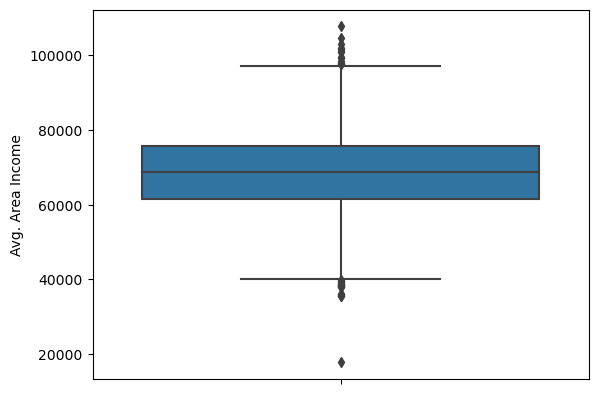

In [9]:
# Checking ouliers of the 'Avg. Area Income'

sns.boxplot(data=df, y='Avg. Area Income')

In [10]:
# Since 'Avg. Area Income' has outliers we use the Median approach to fill NaN values.
df['Avg. Area Income'].fillna(df['Avg. Area Income'].median(), inplace=True)

<AxesSubplot:ylabel='Avg. Area Number of Rooms'>

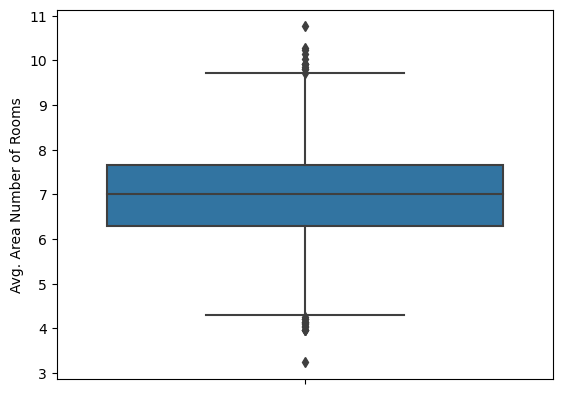

In [11]:
# Checking ouliers of the 'Avg. Area Number of Rooms'

sns.boxplot(data=df, y='Avg. Area Number of Rooms')

In [12]:
# Since 'Avg. Area Number of Rooms' has outliers we use the Median approach to fill NaN values.
df['Avg. Area Number of Rooms'].fillna(df['Avg. Area Number of Rooms'].median(), inplace=True)

<AxesSubplot:ylabel='Avg. Area Number of Bedrooms'>

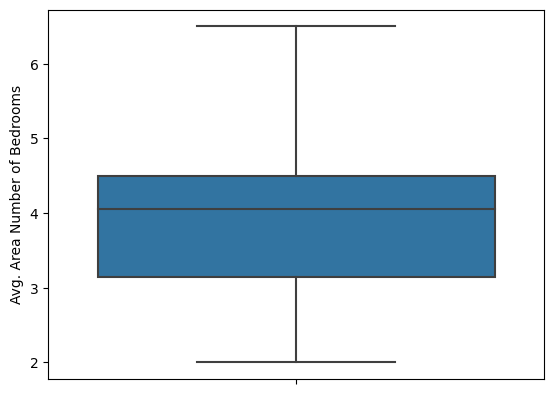

In [13]:
# Checking ouliers of the 'Avg. Area Number of Bedrooms'

sns.boxplot(data=df, y='Avg. Area Number of Bedrooms')

In [14]:
# Since 'Avg. Area Number of Bedrooms' has outliers we use the Median approach to fill NaN values.
df['Avg. Area Number of Bedrooms'].fillna(df['Avg. Area Number of Bedrooms'].median(), inplace=True)

In [15]:
# All missing values have been treated.
df.isna().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
dtype: int64

# Handling the outliers:

In [16]:
def handle_outliers_using_emperical_rule(col):
    upper_cutoff = col.mean() + 3*col.std()
    lower_cutoff = col.mean() - 3*col.std()
    return np.where(col > upper_cutoff, upper_cutoff, np.where(col < lower_cutoff, lower_cutoff, col))

In [17]:
def draw_distplot_and_boxplot(col, outliers_treated = False):
    
    word = "Before"
    
    if outliers_treated:
        word = "After"
    
    plt.figure(figsize=(14,5))

    plt.subplot(1,2,1)
    sns.distplot(col)
    plt.title(f'{word} treating outliers')

    plt.subplot(1,2,2)
    sns.boxplot(y=col)
    plt.ylabel(col.name)

    plt.title(f'{word} treating outliers')

In [18]:
def handle_outliers_using_iqr(col):
    q1 = np.quantile(col, .25)
    q3 = np.quantile(col, .75)
    
    iqr = q3 - q1
    
    upper_limit = q3 + iqr * 1.5
    lower_limit = q1 - iqr * 1.5
    
    print(f'q1: {q1}')
    print(f'q3: {q3}')
    print(f'iqr: {iqr}')
    
    return np.where(col > upper_limit, upper_limit, np.where(col < lower_limit, lower_limit, col))

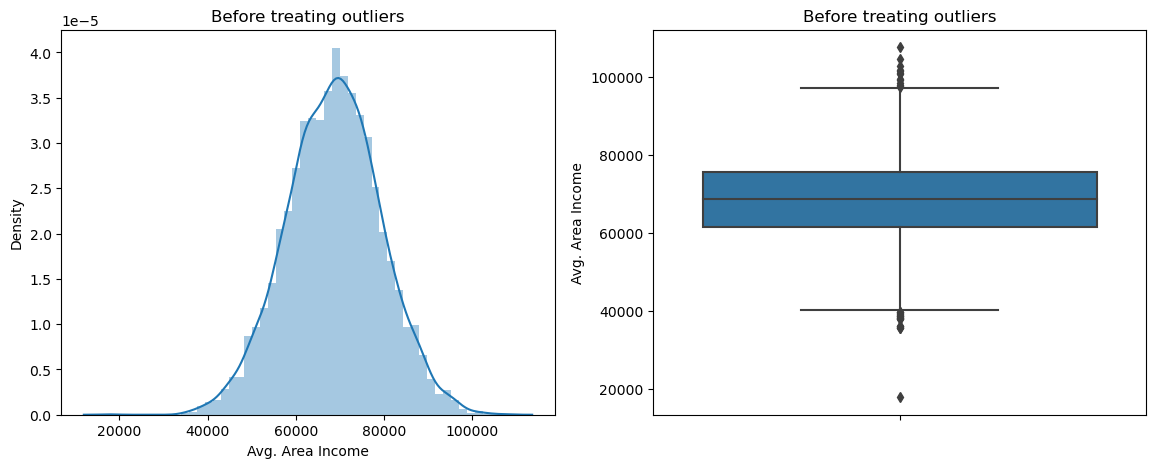

In [19]:
draw_distplot_and_boxplot(df['Avg. Area Income'])

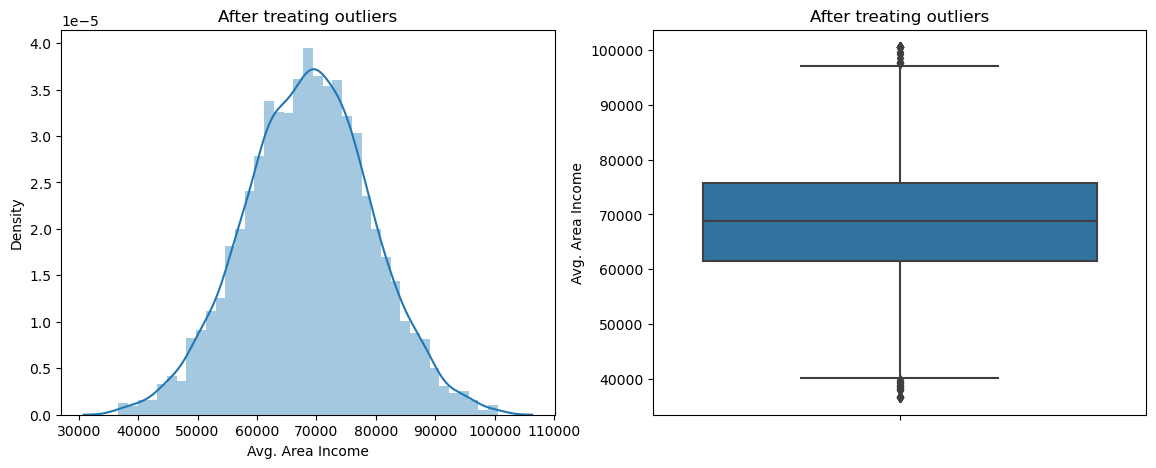

In [20]:
# Since 'Avg. Area Income' is normally distributed so we use the Emperical Rule based approach to treat outliers.

col_name = 'Avg. Area Income'

df[col_name] = handle_outliers_using_emperical_rule(df[col_name])
draw_distplot_and_boxplot(df[col_name], outliers_treated=True)

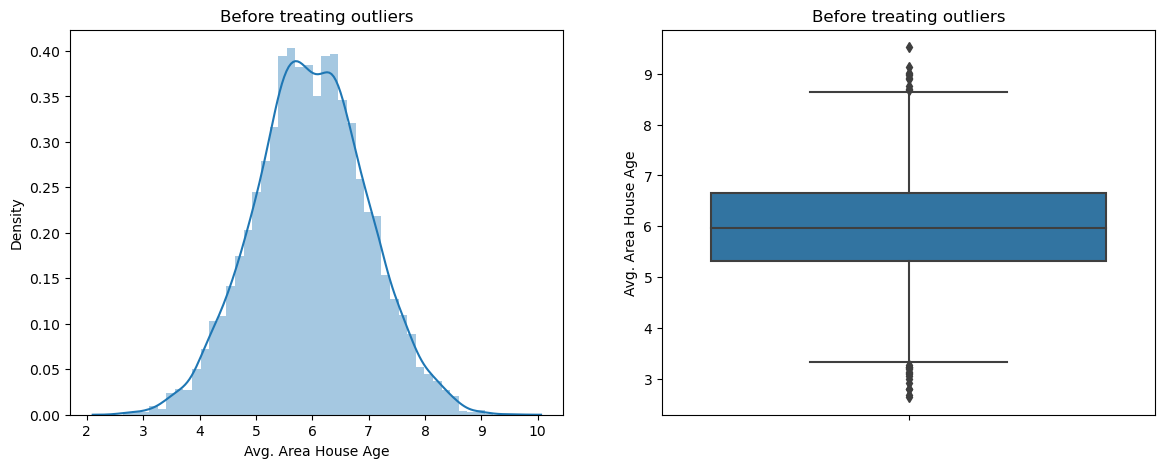

In [21]:
draw_distplot_and_boxplot(df['Avg. Area House Age'])

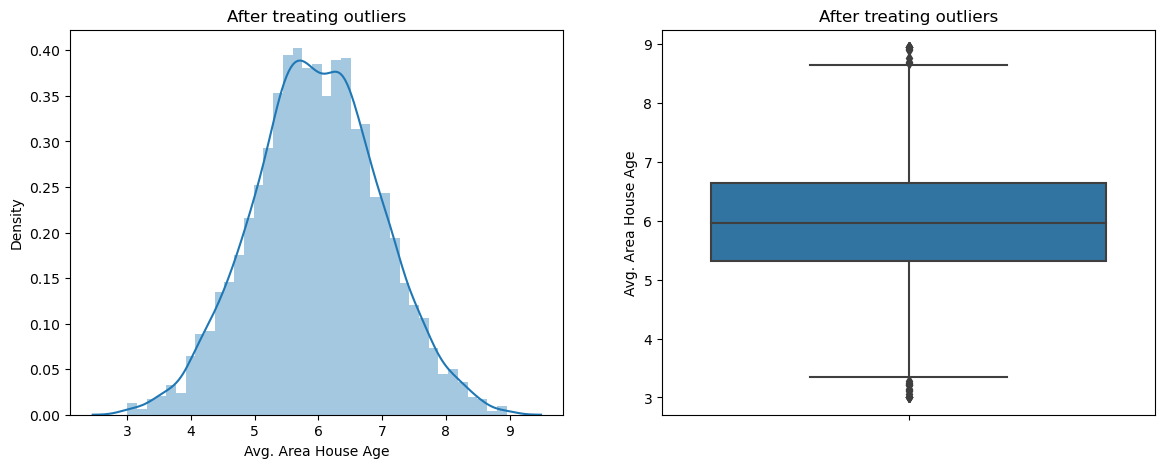

In [22]:
# Since 'Avg. Area House Age' is normally distributed so we use the Emperical Rule based approach to treat outliers.

col_name = 'Avg. Area House Age'

df[col_name] = handle_outliers_using_emperical_rule(df[col_name])
draw_distplot_and_boxplot(df[col_name], outliers_treated=True)

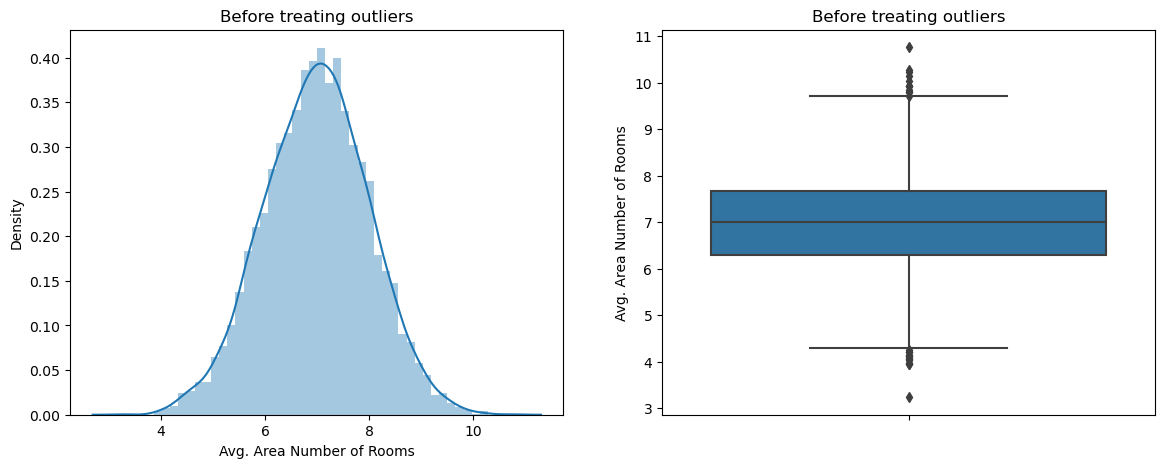

In [23]:
draw_distplot_and_boxplot(df['Avg. Area Number of Rooms'])

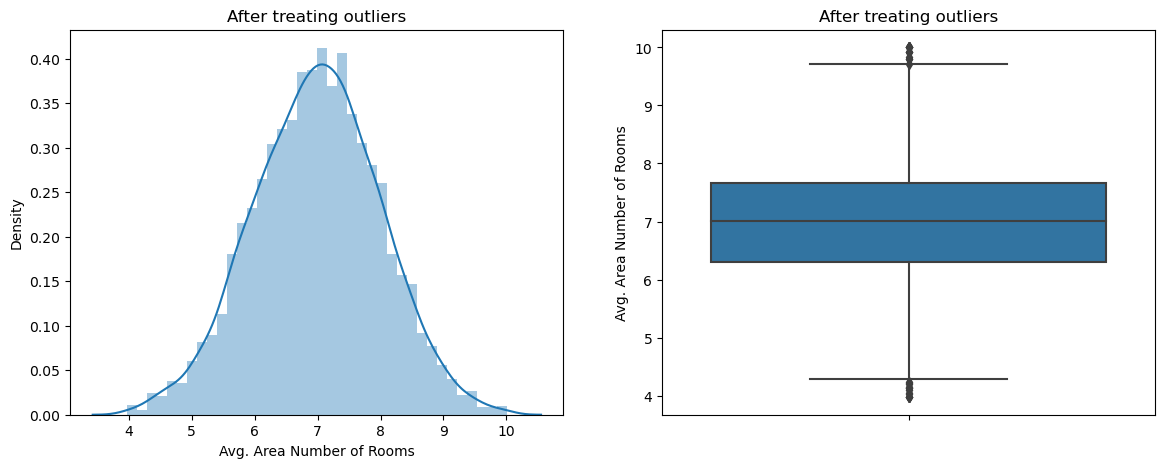

In [24]:
# Since 'Avg. Area Number of Rooms' is normally distributed so we use the Emperical Rule based approach to treat outliers.

col_name = 'Avg. Area Number of Rooms'

df[col_name] = handle_outliers_using_emperical_rule(df[col_name])
draw_distplot_and_boxplot(df[col_name], outliers_treated=True)

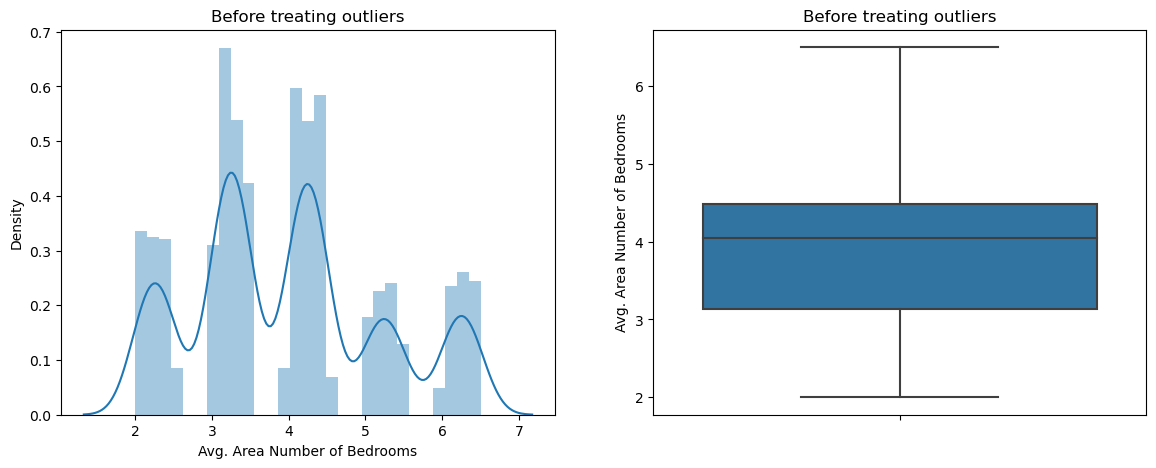

In [25]:
# No outlier treatment requirend for 'Avg. Area Number of Bedrooms'

draw_distplot_and_boxplot(df['Avg. Area Number of Bedrooms'])

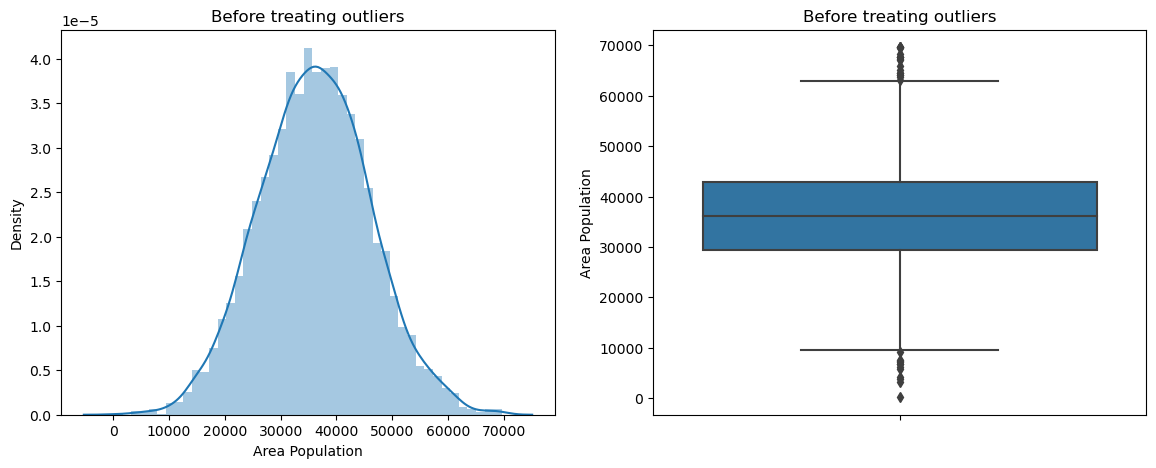

In [26]:
draw_distplot_and_boxplot(df['Area Population'])

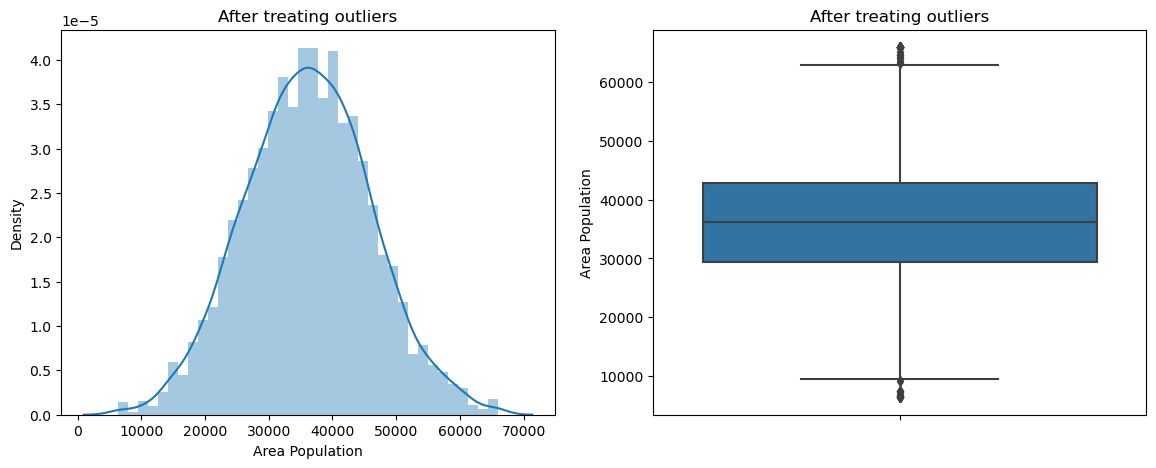

In [27]:
# Since 'Area Population' is normally distributed so we use the Emperical Rule based approach to treat outliers.

col_name = 'Area Population'

df[col_name] = handle_outliers_using_emperical_rule(df[col_name])
draw_distplot_and_boxplot(df[col_name], outliers_treated=True)

<AxesSubplot:ylabel='Area Population'>

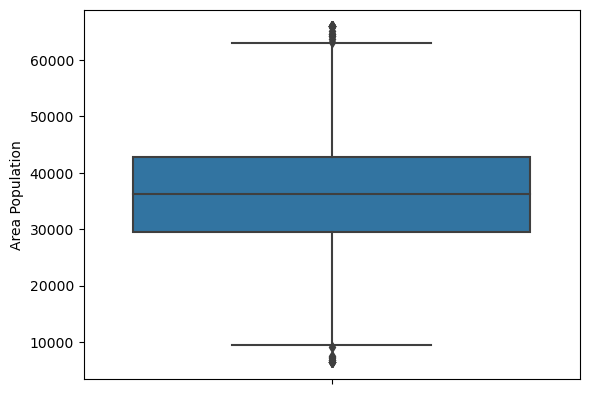

In [28]:
sns.boxplot(y=df['Area Population'])

In [29]:
# "Address" variable we have dropped already.
df.select_dtypes(exclude=['float']).columns

Index([], dtype='object')

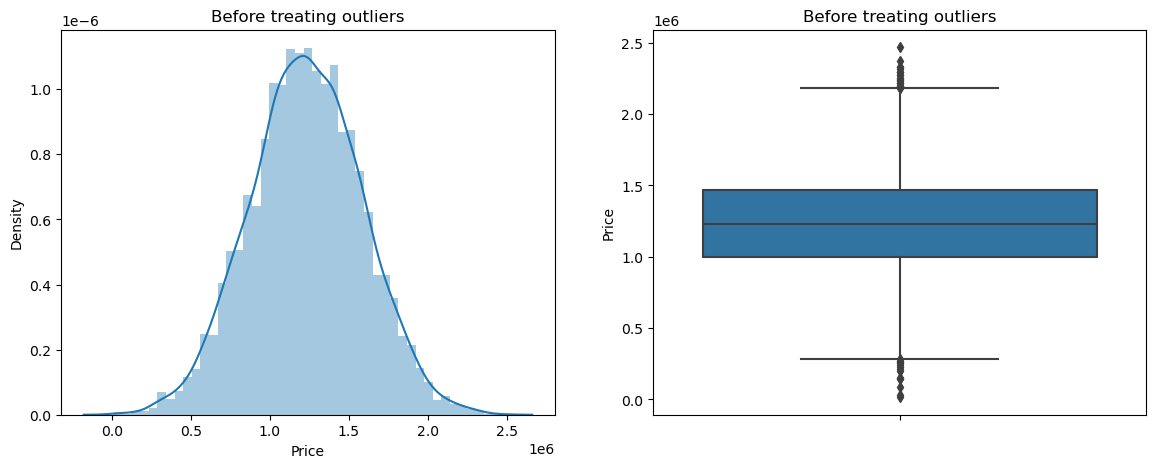

In [30]:
# Since 'Price' is the DV so we do not remove outliers from it.
draw_distplot_and_boxplot(df['Price'])

In [31]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05


# Seperating the independent and dependent variables from the dataframe.

In [32]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1:]

In [33]:
x

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.45857,5.682861,7.009188,4.09,23086.80050
1,79248.64245,6.002900,6.730821,3.09,40173.07217
2,61287.06718,5.865890,8.512727,5.13,36882.15940
3,63345.24005,7.188236,5.586729,3.26,34310.24283
4,59982.19723,5.040555,7.839388,4.23,26354.10947
...,...,...,...,...,...
4995,60567.94414,7.830362,6.137356,3.46,22837.36103
4996,78491.27543,6.999135,6.576763,4.02,25616.11549
4997,63390.68689,7.250591,4.805081,2.13,33266.14549
4998,68001.33124,5.534388,7.130144,5.44,42625.62016


In [34]:
y

,Price
0,1.059034e+06
1,1.505891e+06
2,1.058988e+06
3,1.260617e+06
4,6.309435e+05
...,...
4995,1.060194e+06
4996,1.482618e+06
4997,1.030730e+06
4998,1.198657e+06


# Feature Scaling:

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [36]:
sc_x = sc.fit_transform(x)
sc_y = sc.fit_transform(y)

In [37]:
pd.DataFrame(sc_x, columns=x.columns)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,1.032799,-0.297376,0.021522,0.087582,-1.320738
1,1.004826,0.025873,-0.255765,-0.723031,0.405219
2,-0.687895,-0.112511,1.519227,0.930619,0.072790
3,-0.493931,1.223098,-1.395417,-0.585227,-0.187010
4,-0.810868,-0.946125,0.848500,0.201068,-0.990693
...,...,...,...,...,...
4995,-0.755666,1.871664,-0.846926,-0.423104,-1.345935
4996,0.933451,1.032100,-0.409225,0.030839,-1.065241
4997,-0.489648,1.286078,-2.174031,-1.501219,-0.292479
4998,-0.055135,-0.447338,0.142009,1.181909,0.652961


In [38]:
pd.DataFrame(sc_y, columns=y.columns)

,Price
0,-0.490081
1,0.775508
2,-0.490211
3,0.080843
4,-1.702518
...,...
4995,-0.486795
4996,0.709594
4997,-0.570244
4998,-0.094640


<AxesSubplot:>

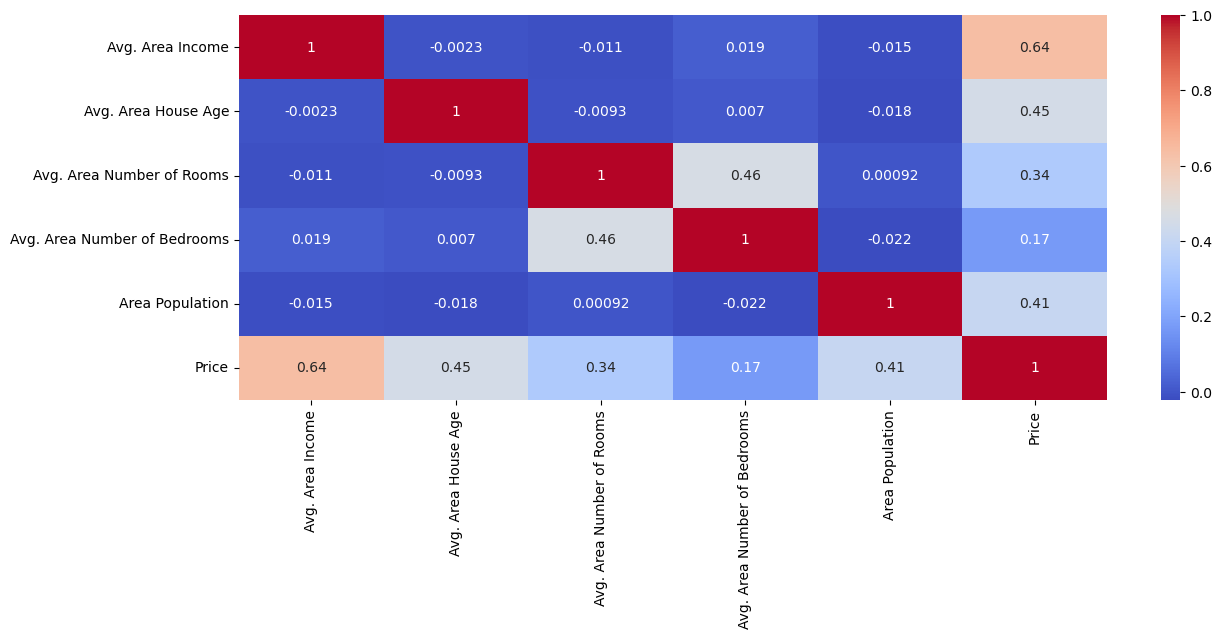

In [39]:
# Checking for multicollinearity assumption of the Linear Regression using heatmap.
# From the heatmap we can see that no two IDVs are perfectly correlated to each other.

plt.figure(figsize=(14, 5))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")

In [40]:
# To detect Linear dependence b/w more than 2 IDVs we use the VIF(Variance Inflation Factor) measure:
from statsmodels.stats.outliers_influence import variance_inflation_factor

df_vif = pd.DataFrame()
df_vif['VIF'] = [variance_inflation_factor(sc_x, i) for i in range(5)]

In [41]:
df_vif

,VIF
0,1.001075
1,1.000588
2,1.273648
3,1.274523
4,1.001191


In [42]:
variance_inflation_factor(sc_x, 0)

1.0010753624293578

In [43]:
df_vif['Features'] = x.columns

In [44]:
# Since the VIF for all the Features/explanatory variables is less than 5 therefore there is no multicollinearity b/w the 
# explanatory variables present in the model.
df_vif

,VIF,Features
0,1.001075,Avg. Area Income
1,1.000588,Avg. Area House Age
2,1.273648,Avg. Area Number of Rooms
3,1.274523,Avg. Area Number of Bedrooms
4,1.001191,Area Population


# Splitting the data into train and test datasets:

In [45]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [46]:
x_train

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
3413,69048.78809,6.619712,6.123813,4.33,36817.36876
1610,67866.89993,5.393978,9.359022,5.44,43122.57418
3459,56636.23819,5.497667,7.121872,6.10,47541.43176
4293,79310.36198,4.247434,7.518204,4.38,43982.18896
1039,72821.24766,6.480819,7.116655,5.33,40594.05930
...,...,...,...,...,...
4171,56610.64256,4.846832,7.558137,3.29,25494.74030
599,70596.85095,6.548274,6.539986,3.10,51614.83014
1361,55621.89910,3.735942,6.868291,2.30,63184.61315
1547,63044.46010,5.935261,5.913454,4.10,32725.27954


In [47]:
y_train

,Price
3413,1.305210e+06
1610,1.400961e+06
3459,1.048640e+06
4293,1.231157e+06
1039,1.391233e+06
...,...
4171,7.296417e+05
599,1.599479e+06
1361,1.102641e+06
1547,8.650995e+05


In [48]:
x_test

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
1718,66774.99582,5.717143,7.795215,4.32,36788.980330
2511,62184.53937,4.925758,7.427689,6.22,26008.309120
345,73643.05730,6.766853,8.337085,3.34,43152.139580
2521,61909.04144,6.228343,6.593138,4.29,28953.925380
54,72942.70506,4.786222,7.319886,6.41,24377.909050
...,...,...,...,...,...
3900,77615.85134,6.200603,6.909327,2.27,36591.523450
3753,66925.19935,5.153050,8.396903,3.16,42590.685170
3582,71778.02618,5.921280,7.411045,4.00,37634.041320
2392,87272.09339,5.025866,7.184765,5.39,7522.333138


In [49]:
y_test

,Price
1718,1.251689e+06
2511,8.730483e+05
345,1.696978e+06
2521,1.063964e+06
54,9.487883e+05
...,...
3900,1.466412e+06
3753,1.222412e+06
3582,1.404622e+06
2392,9.100996e+05


# Building the Multiple Linear Regression Model:

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression()

In [52]:
# linear_model.coef_ returns the regression co-efficients of IDVs.
linear_model.coef_

array([[2.16353974e+01, 1.65674794e+05, 1.20300863e+05, 2.29245801e+03,
        1.53556060e+01]])

In [53]:
# linear_model.intercept_ returns the intercept i.e. value of DV(Price) when all IDVs(Independent variables) are 0.
linear_model.intercept_

array([-2646776.98160008])

# Testing the Multiple Linear Regression model:

In [54]:
y_pred_test = linear_model.predict(x_test)

In [55]:
y_pred_test

array([[1257704.69208431],
       [ 821873.99122465],
       [1740859.46705703],
       [ 972129.01284561],
       [ 993944.59630312],
       [ 643946.83289567],
       [1073760.07773436],
       [ 856002.35009232],
       [1445205.14421084],
       [1203703.57547565],
       [1455880.98606473],
       [1297672.85336702],
       [1737248.9431844 ],
       [1337233.58937444],
       [1387594.77476552],
       [1222979.36218841],
       [ 613233.15420579],
       [ 963730.84557726],
       [1220798.81110391],
       [1197926.12346939],
       [ 504089.5727926 ],
       [1769936.82227448],
       [1855628.26499843],
       [1199672.14492143],
       [1064869.29690102],
       [1813198.43666285],
       [1769651.14148833],
       [1439859.90076787],
       [1386742.63882761],
       [1541508.89077117],
       [ 726901.959149  ],
       [1755494.66973674],
       [1463833.21465256],
       [1025401.01390795],
       [1284462.64317836],
       [ 916849.39996572],
       [1187490.27813605],
 

In [56]:
y_test

,Price
1718,1.251689e+06
2511,8.730483e+05
345,1.696978e+06
2521,1.063964e+06
54,9.487883e+05
...,...
3900,1.466412e+06
3753,1.222412e+06
3582,1.404622e+06
2392,9.100996e+05


# Calculating the Metrics for our MLR based model:

In [57]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [58]:
y_pred_train = linear_model.predict(x_train)

In [59]:
# MAE(Mean Absolute Error) for the DV(Price) on test data.
mean_absolute_error(y_test, y_pred_test)

81552.12360150188

In [60]:
# MAE(Mean Absolute Error) for the DV(Price) on train data.
mean_absolute_error(y_train, y_pred_train)

81958.4653418816

In [61]:
# MSE(Mean Squared Error) for the DV(Price) on test data.
mse_test = mean_squared_error(y_test, y_pred_test)
mse_test

10150904982.825567

In [62]:
# MSE(Mean Squared Error) for the DV(Price) on train data.
mse_train = mean_squared_error(y_train, y_pred_train)
mse_train

10479522063.810347

In [63]:
# RMSE(Root Mean Squared Error) for the DV(Price) on test data.
np.sqrt(mse_test)

100751.69965229156

In [64]:
# RMSE(Root Mean Squared Error) for the DV(Price) on train data.
np.sqrt(mse_train)

102369.53679591574

In [65]:
# R2 score for test data comes as 0.9208 which means 92.08% of the variance in Price column can be explained using the IDVs.
r2_score_test = r2_score(y_test, y_pred_test)
r2_score_test

0.9207760888852947

In [66]:
# R2 score for test data comes as 0.9153
r2_score_train = r2_score(y_train, y_pred_train)
r2_score_train

0.9153109166711009

In [67]:
# Adjusted R2 score for the test data.
# Adjusted R2 score formula:
# adj_r2_score = 1 - ((1-r2_score)*(n-1)/(n-k-1)) where:
# n = number of rows in the training dataset, k = number of IDVs.
k = 5
n = 1000
adj_r2_score_test = 1 - ((1-r2_score_test)*(n-1)/(n-k-1))
adj_r2_score_test

0.9203775782660054

In [68]:
# Adjusted R2 score for the test data.
# n = number of rows in the training dataset, k = number of IDVs.
k = 5
n = 4000
adj_r2_score_train = 1 - ((1-r2_score_train)*(n-1)/(n-k-1))
adj_r2_score_train

0.9152048962863626

### Since the difference in the R2 score for the train and test data is less than 1% therfore there is no variance issue in our model.

In [69]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf

In [70]:
reg_model = smf.OLS(endog = y_train, exog=x_train).fit()

In [71]:
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.964
Method:                 Least Squares   F-statistic:                          2.158e+04
Date:                Sun, 16 Jul 2023   Prob (F-statistic):                        0.00
Time:                        15:22:55   Log-Likelihood:                         -55254.
No. Observations:                4000   AIC:                                  1.105e+05
Df Residuals:                    3995   BIC:                                  1.105e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Avg. Area Income                10.2554      0.302     33.987      0.000       9.664      10.847
Avg. Area House Age           4.943e+04   3312.680     14.922      0.000    4.29e+04    5.59e+04
Avg. Area Number of Rooms    -1.088e+04   3664.058     -2.970      0.003   -1.81e+04   -3698.694
Avg. Area Number of Bedrooms  5232.9175   3500.236      1.495      0.135   -1629.499    1.21e+04
Area Population                  8.4229      0.366     23.000      0.000       7.705       9.141
==============================================================================
Omnibus:                        0.323   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.851   Jarque-Bera (JB):                0.356
Skew:                          -0.019   Prob(JB):                        0.837
Kurtosis:                       2.972   Cond. No.                     9.30e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 9.3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Checking Linearity Assumption:

In [72]:
residual_error_train = y_pred_train-y_train

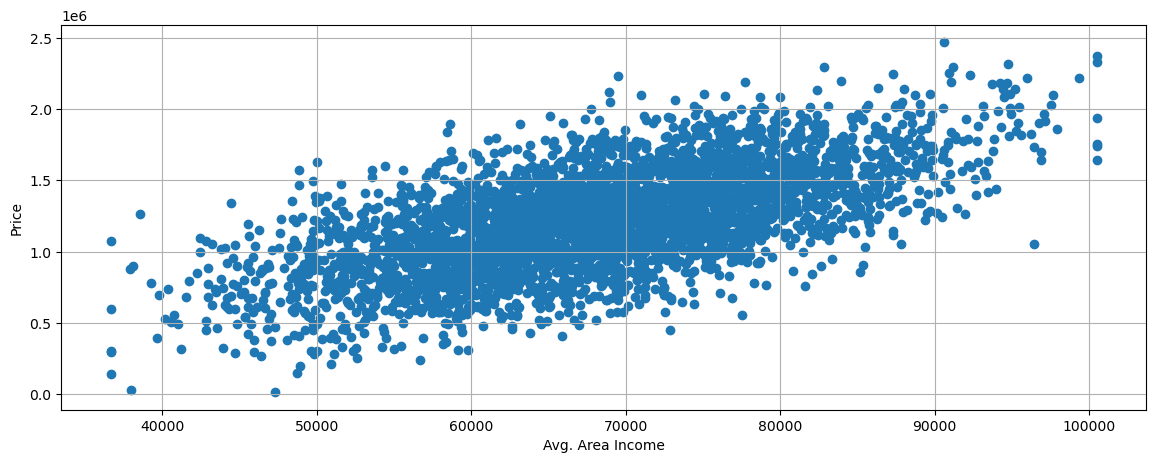

In [73]:
plt.figure(figsize = (14,5))
plt.scatter(x_train['Avg. Area Income'], y_train)
plt.xlabel('Avg. Area Income')
plt.ylabel('Price')
plt.grid()

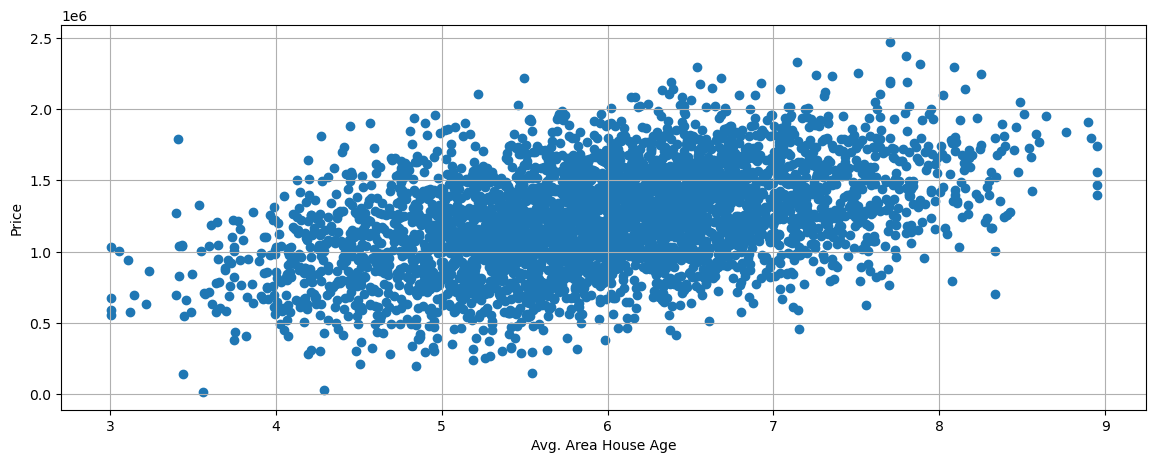

In [74]:
plt.figure(figsize = (14,5))
plt.scatter(x_train['Avg. Area House Age'], y_train)
plt.xlabel('Avg. Area House Age')
plt.ylabel('Price')
plt.grid()

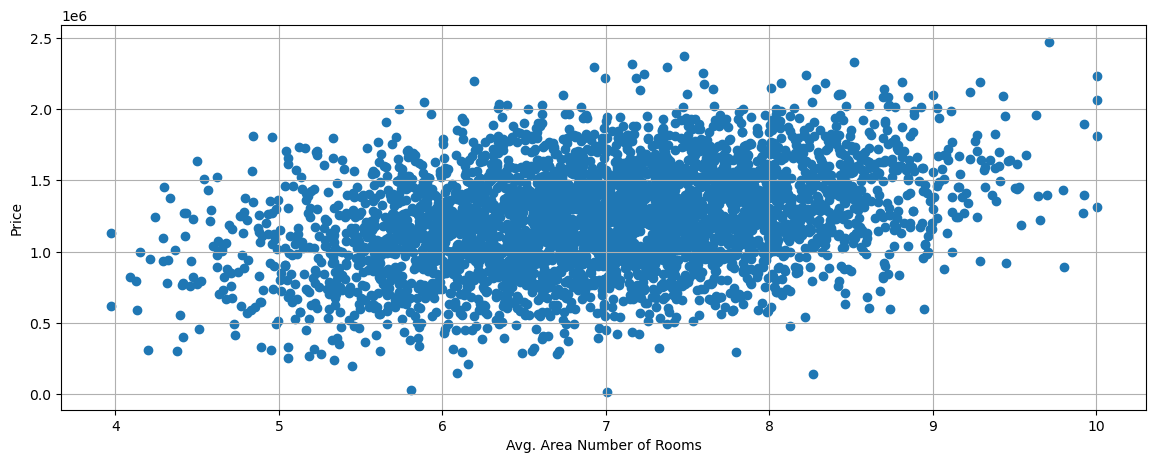

In [75]:
plt.figure(figsize = (14,5))
plt.scatter(x_train['Avg. Area Number of Rooms'], y_train)
plt.xlabel('Avg. Area Number of Rooms')
plt.ylabel('Price')
plt.grid()

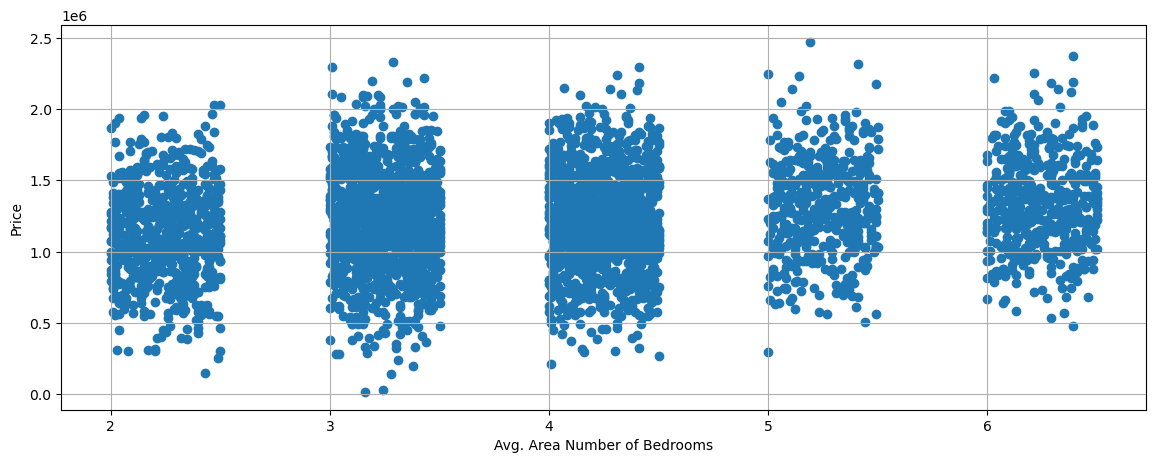

In [76]:
plt.figure(figsize = (14,5))
plt.scatter(x_train['Avg. Area Number of Bedrooms'], y_train)
plt.xlabel('Avg. Area Number of Bedrooms')
plt.ylabel('Price')
plt.grid()

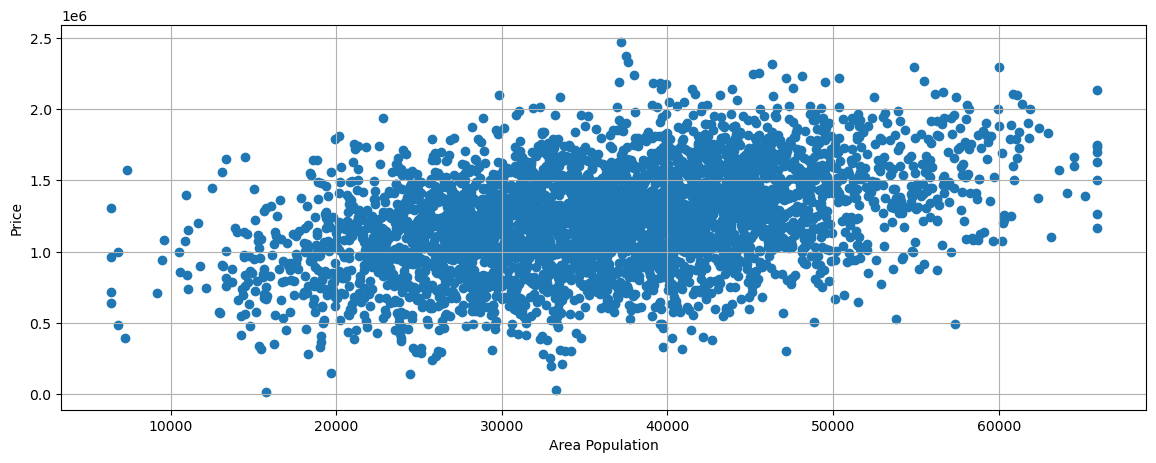

In [77]:
plt.figure(figsize = (14,5))
plt.scatter(x_train['Area Population'], y_train)
plt.xlabel('Area Population')
plt.ylabel('Price')
plt.grid()

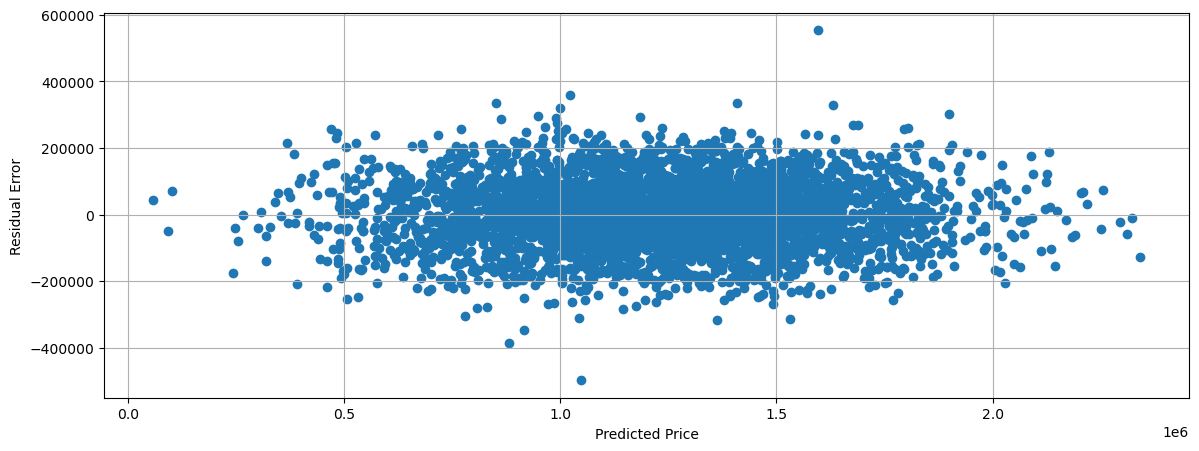

In [78]:
plt.figure(figsize = (14,5))
plt.scatter(y_pred_train, residual_error_train)
plt.xlabel('Predicted Price')
plt.ylabel('Residual Error')
plt.grid()

### There is no pattern observed b/w the Residual Error and the Actual Price. Hence the Linearity assumption holds.

## Checking Homoscedasticity Assumption:

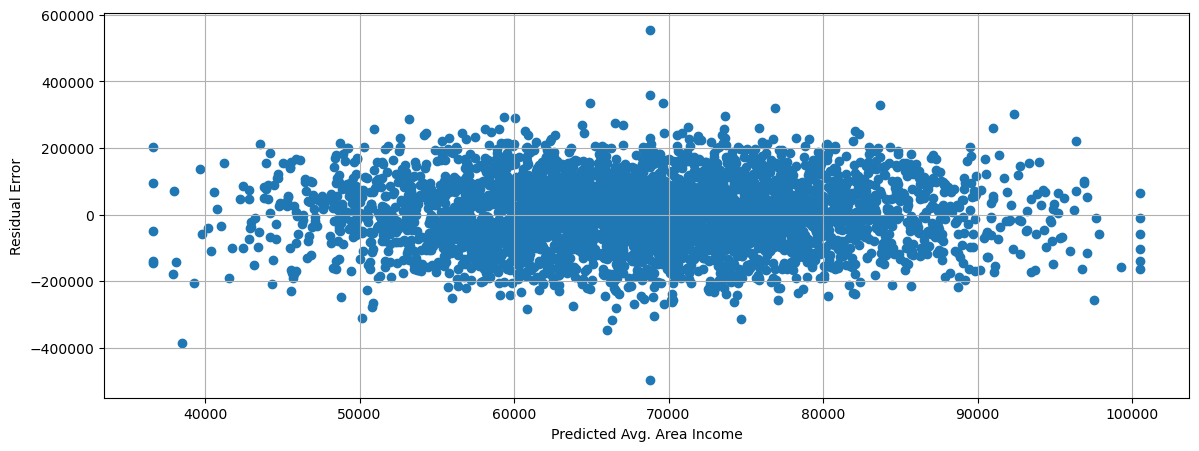

In [79]:
plt.figure(figsize = (14,5))
plt.scatter(x_train['Avg. Area Income'], residual_error_train)
plt.xlabel('Predicted Avg. Area Income')
plt.ylabel('Residual Error')
plt.grid()

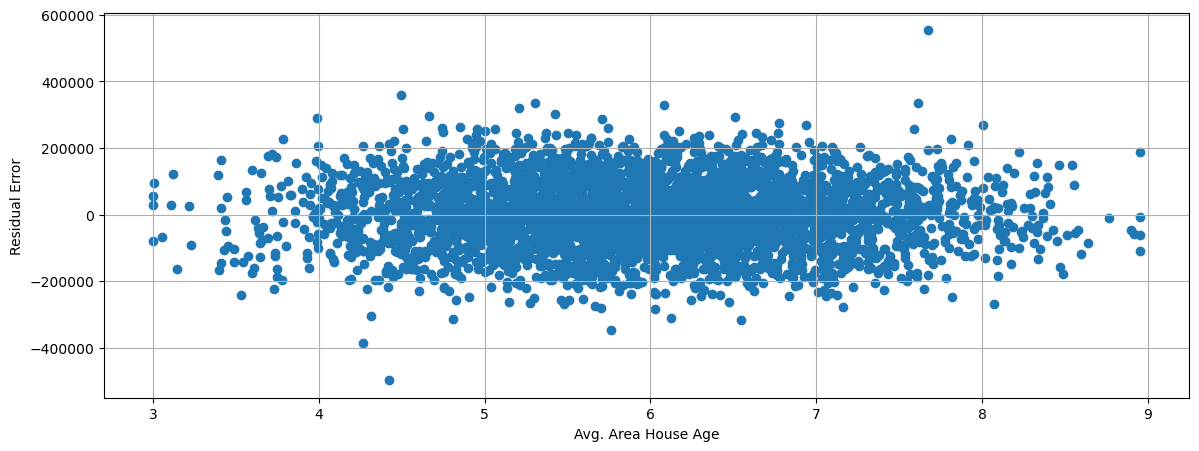

In [80]:
plt.figure(figsize = (14,5))
plt.scatter(x_train['Avg. Area House Age'], residual_error_train)
plt.xlabel('Avg. Area House Age')
plt.ylabel('Residual Error')
plt.grid()

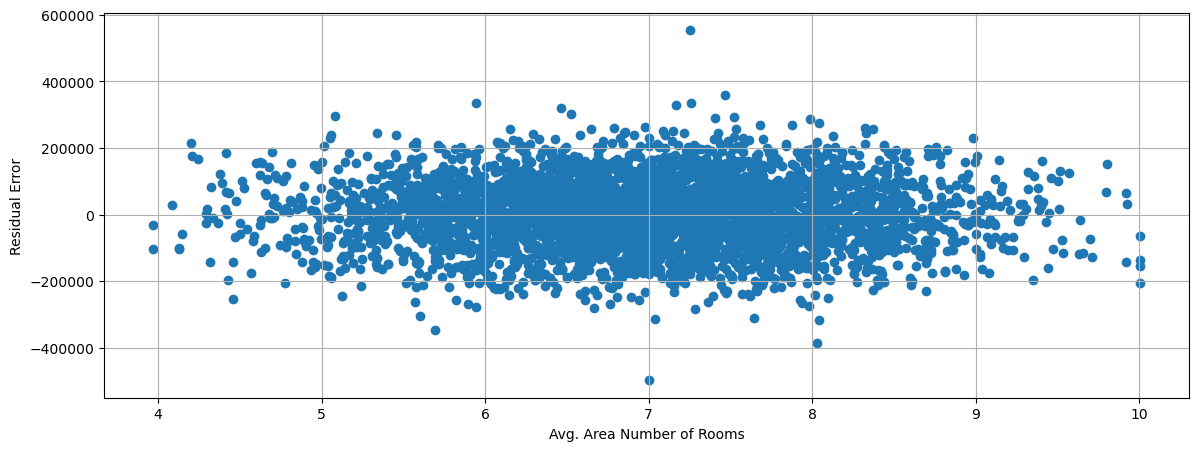

In [81]:
plt.figure(figsize = (14,5))
plt.scatter(x_train['Avg. Area Number of Rooms'], residual_error_train)
plt.xlabel('Avg. Area Number of Rooms')
plt.ylabel('Residual Error')
plt.grid()

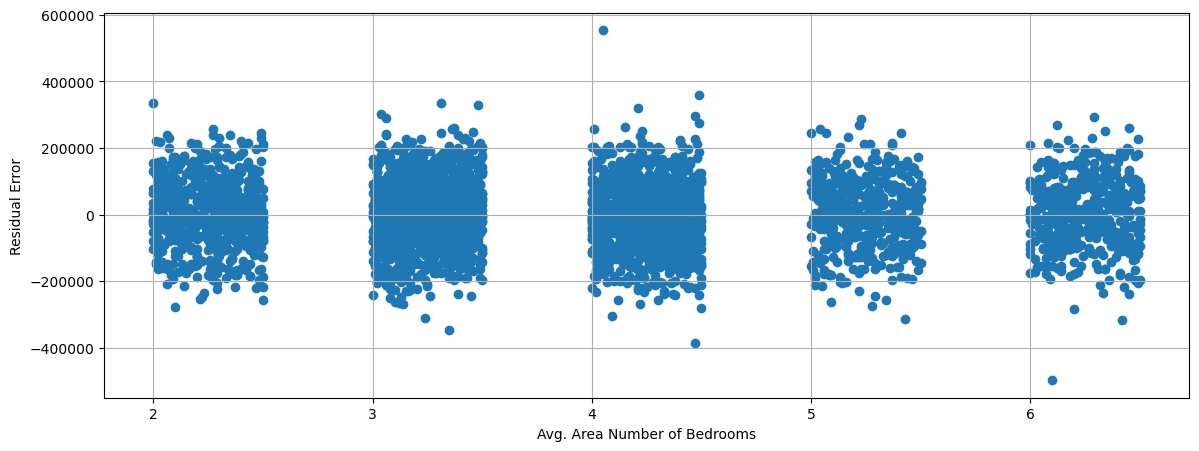

In [82]:
plt.figure(figsize = (14,5))
plt.scatter(x_train['Avg. Area Number of Bedrooms'], residual_error_train)
plt.xlabel('Avg. Area Number of Bedrooms')
plt.ylabel('Residual Error')
plt.grid()

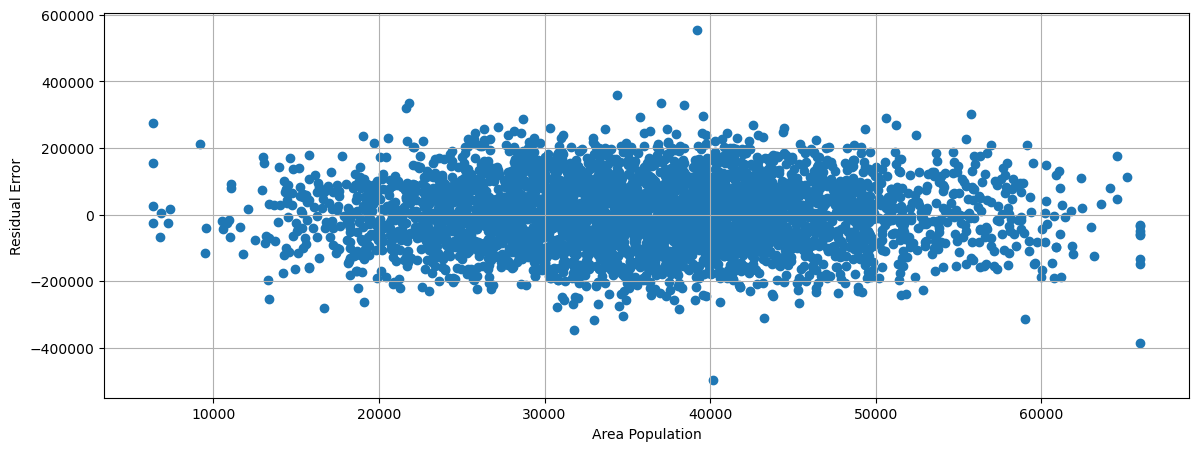

In [83]:
plt.figure(figsize = (14,5))
plt.scatter(x_train['Area Population'], residual_error_train)
plt.xlabel('Area Population')
plt.ylabel('Residual Error')
plt.grid()

### There is no pattern observed b/w the Residual Error and across the values of IDVs. Hence the Homoscedasticity assumption holds.

## Checking the Normality Assumption:

Text(0.5, 0, 'Residual Error')

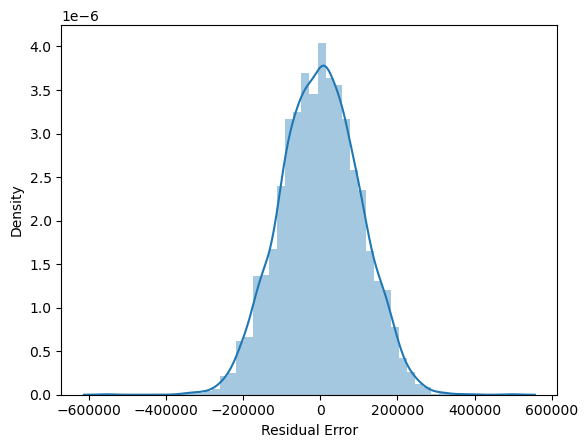

In [84]:
sns.distplot(y_train-y_pred_train)
plt.xlabel('Residual Error')

### Residual Error is normally distributed. Hence the Normality assumption holds.

## Checking for the Autocorrelation assumption:

### Since the Durbin-Watson test is 1.993 which is close to 2 hence no autocoorelation is there b/w the adjacent residual errors.